(<Axes: >, <matplotlib.image.AxesImage at 0x30857bd90>)

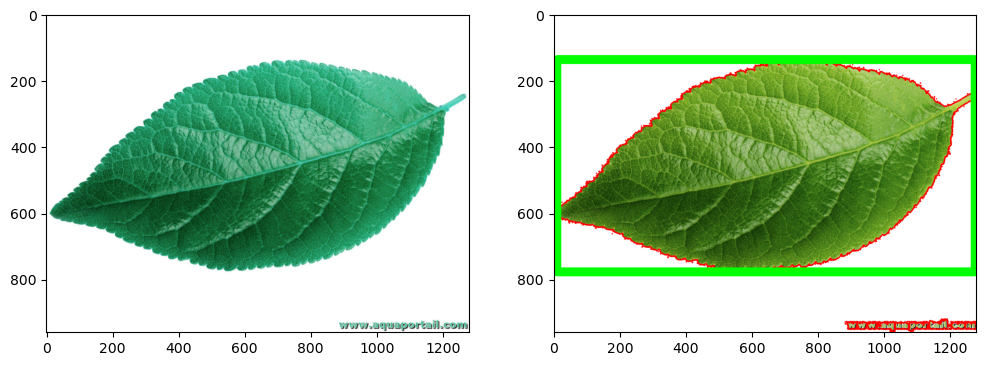

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

img = cv2.imread('/Users/titouanlegourrierec/Downloads/feuille.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = cv2.imread('/Users/titouanlegourrierec/Downloads/feuille.jpg')

lower = np.array([3, 3, 3])  # Lower bounds for BGR channels
higher = np.array([250, 250, 250])

mask = cv2.inRange(img,lower,higher)

cont,_ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cont_image = cv2.drawContours(img, cont, -1, 255, 3)

c = max(cont, key=cv2.contourArea)

x,y,w,h = cv2.boundingRect(c)

cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 25)
plt.figure(figsize=(12,12))
plt.subplot(1,2,1), plt.imshow(img1)
plt.subplot(1,2,2), plt.imshow(cont_image)


(<Axes: >, <matplotlib.image.AxesImage at 0x11fa04110>)

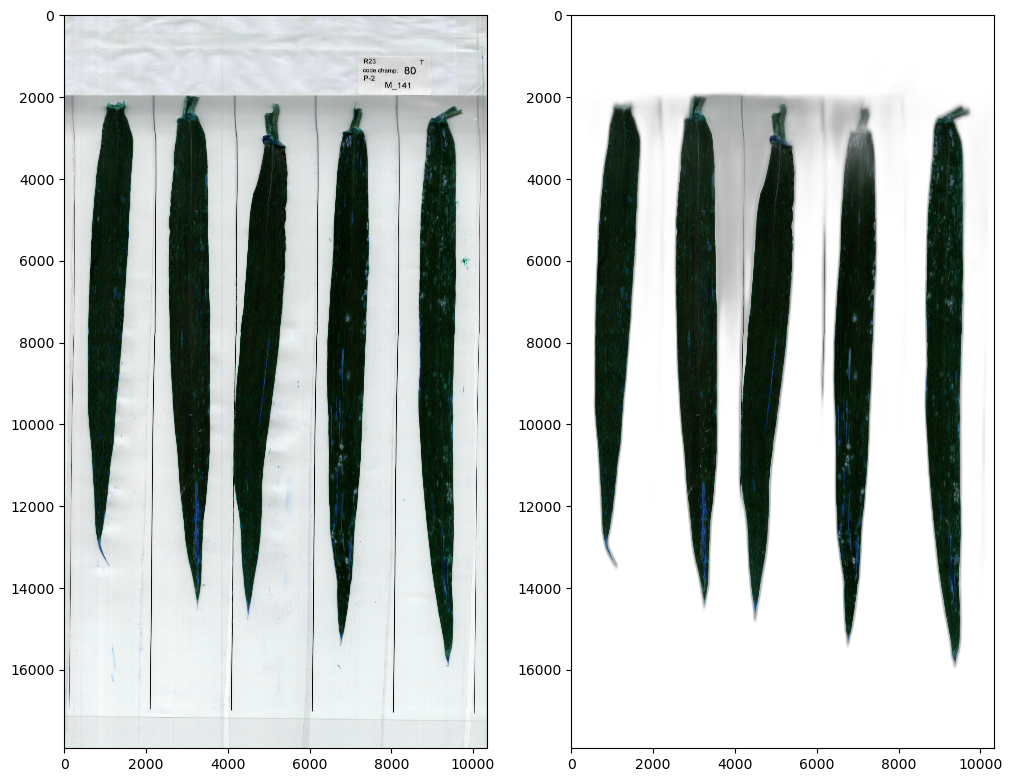

In [113]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1), plt.imshow(input)
plt.subplot(1,2,2), plt.imshow(output)

In [2]:
from rembg import remove
from PIL import Image

Image.MAX_IMAGE_PIXELS = None

input = Image.open('/Users/titouanlegourrierec/Desktop/all_scan_data/all_090523/173.jpg')
output = remove(input)

#output.save('/Users/titouanlegourrierec/Desktop/output_test.png')

2024-03-28 11:51:47.993537 [W:onnxruntime:, coreml_execution_provider.cc:81 GetCapability] CoreMLExecutionProvider::GetCapability, number of partitions supported by CoreML: 67 number of nodes in the graph: 371 number of nodes supported by CoreML: 300


Corrupt JPEG data: 4377 extraneous bytes before marker 0xd1
2024-03-29 10:25:23.948304 [W:onnxruntime:, coreml_execution_provider.cc:81 GetCapability] CoreMLExecutionProvider::GetCapability, number of partitions supported by CoreML: 67 number of nodes in the graph: 371 number of nodes supported by CoreML: 300


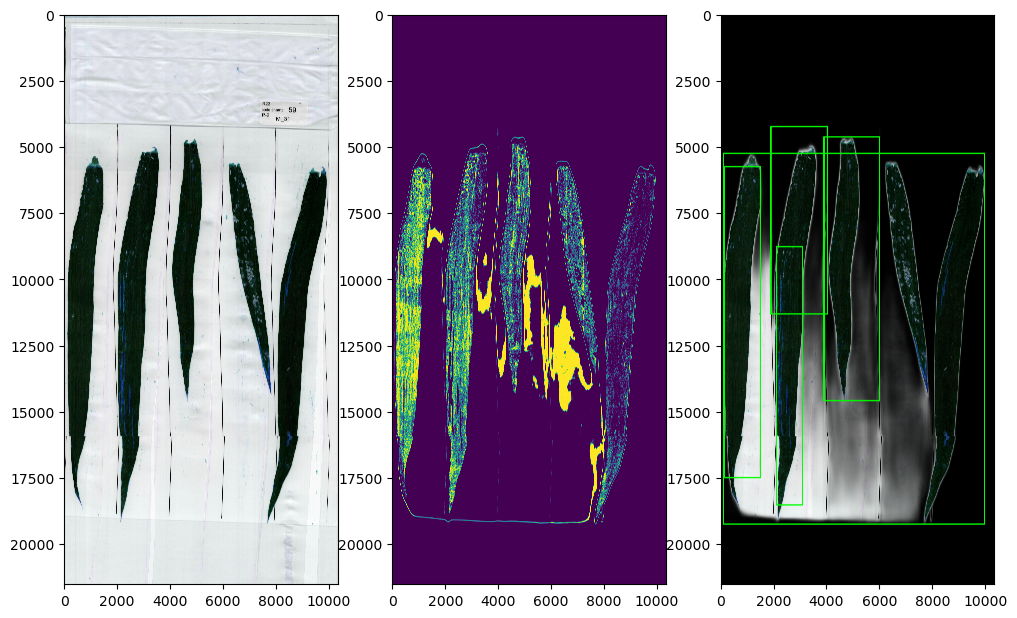

In [9]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




from rembg import remove
from PIL import Image

Image.MAX_IMAGE_PIXELS = None

#input = Image.open('/Users/titouanlegourrierec/Desktop/all_scan_data/all_100523/1.jpg')

input = cv2.imread('/Users/titouanlegourrierec/Desktop/all_scan_data/all_090523/126.jpg')

output = remove(input)



output = np.array(output)
input = np.array(input)


threshold_area = 600000

img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

#lower = np.array([50, 20, 50])  # Lower bounds for BGR channels
#higher = np.array([250, 250, 250])

lower = np.array([7, 25, 7])  # Lower bounds for BGR channels (set blue and red to 0)
higher = np.array([40, 240, 40])

mask = cv2.inRange(img, lower, higher)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for c in contours:
    area = cv2.contourArea(c)
    if area > threshold_area:  # Adjust threshold_area to your desired value
        x, y, w, h = cv2.boundingRect(c)
        if w > 400 and h > 5000:
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 50)


plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1), plt.imshow(input)
plt.subplot(1, 3, 2), plt.imshow(mask)
plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Corrupt JPEG data: 4377 extraneous bytes before marker 0xd1


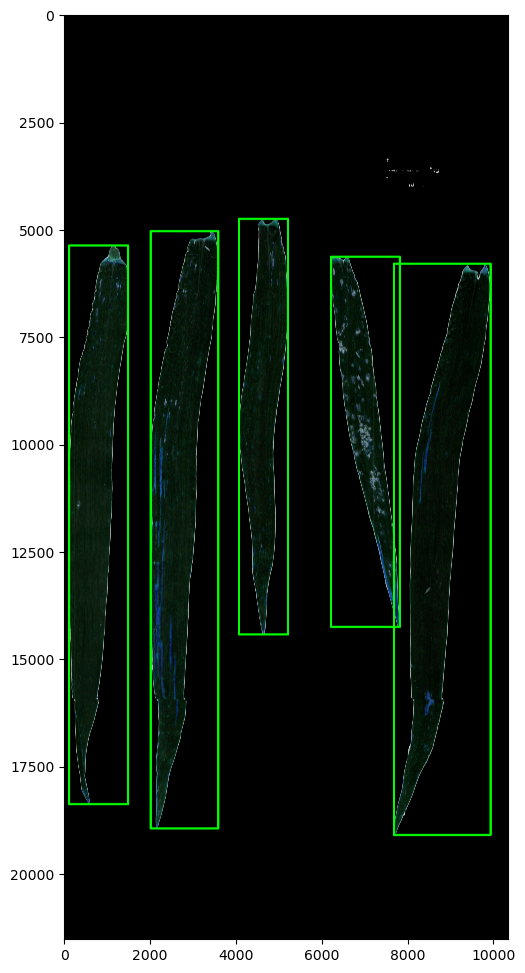

In [10]:
# Charger l'image
image = cv2.imread('/Users/titouanlegourrierec/Desktop/all_scan_data/all_090523/126.jpg')

# Appliquer un gros flou sur l'image
image_floue = cv2.blur(image, (80, 80))  # Vous pouvez ajuster la taille du noyau pour contrôler l'intensité du flou

# Binariser l'image floue en utilisant un seuil spécifique
seuil = 128  # Seuil de binarisation (modifier selon vos besoins)
valeur_maximale = 255  # Valeur maximale pour les pixels binarisés
_, image_floue_binarisee = cv2.threshold(image_floue, seuil, valeur_maximale, cv2.THRESH_BINARY)
image_floue_binarisee = cv2.cvtColor(image_floue_binarisee, cv2.COLOR_BGR2GRAY)

# Binariser l'image en utilisant un seuil
_, binary_image = cv2.threshold(image_floue_binarisee, 245, 255, cv2.THRESH_BINARY_INV)

# Utiliser l'image binaire comme masque pour conserver uniquement les pixels non blancs
result = cv2.bitwise_and(image, image, mask=binary_image)

contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


for c in contours:
    area = cv2.contourArea(c)
    if area > threshold_area:  # Adjust threshold_area to your desired value
        x, y, w, h = cv2.boundingRect(c)
        if w > 400 and h > 5000:
            cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 50)

plt.figure(figsize=(12,12))
plt.imshow(result)

---
# Comparaison

x,y,w,h: 0 0 10336 17920


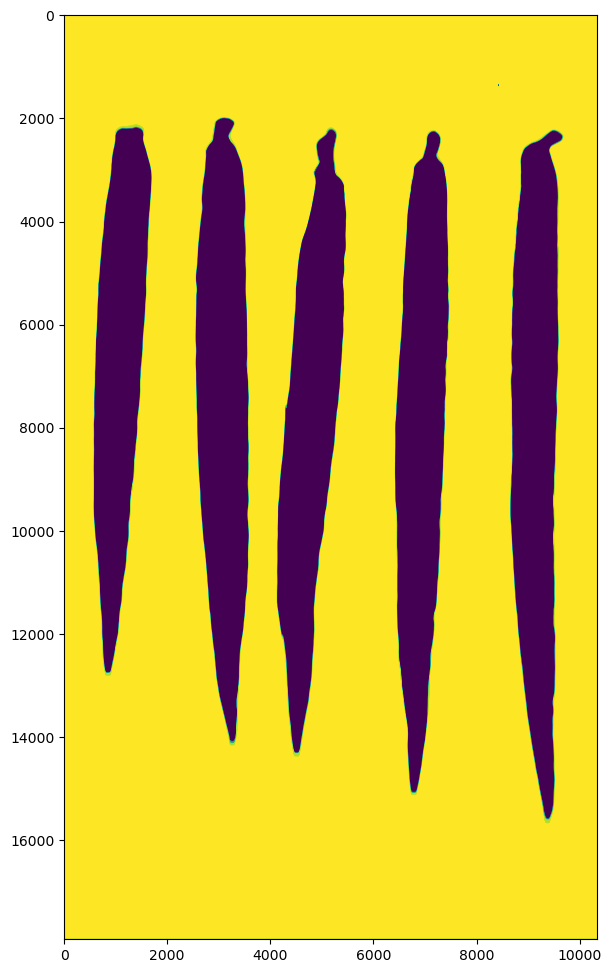

In [56]:
import cv2
import numpy as np

# read image
gray = image_floue_binarisee

# convert to grayscale
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# threshold
thresh = cv2.threshold(gray,128,255,cv2.THRESH_BINARY)[1]

# get contours
result = img.copy()
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
    print("x,y,w,h:",x,y,w,h)
 

plt.figure(figsize=(12,12))
plt.imshow(result)

---
# KMEANS


In [45]:
from sklearn.cluster import KMeans

#image = cv2.imread('/Users/titouanlegourrierec/Desktop/all_scan_data/all_090523/56.jpg')
image = cv2.imread('/Users/titouanlegourrierec/Desktop/all_scan_data/all_090523/1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Corrupt JPEG data: 4110 extraneous bytes before marker 0xd5


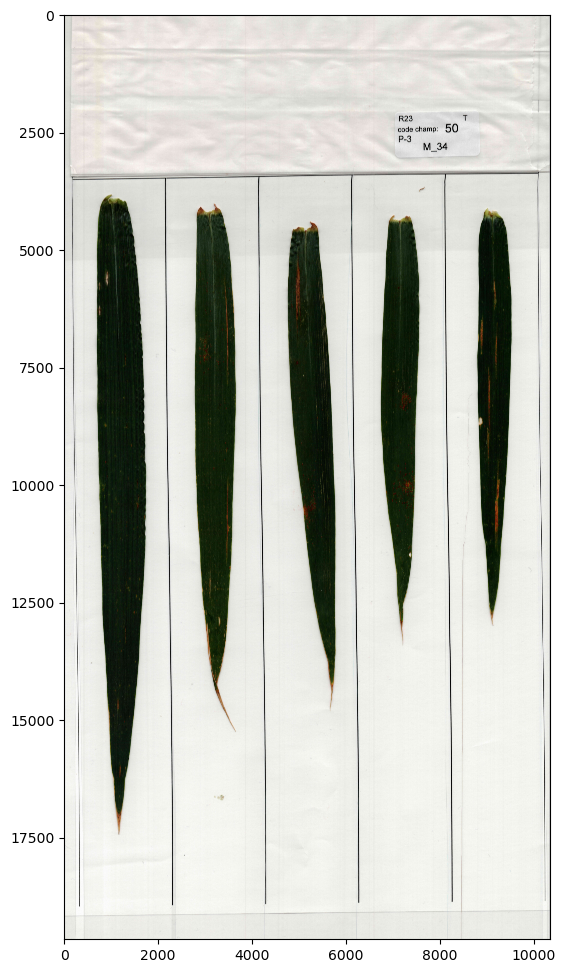

In [46]:
plt.figure(figsize=(12,12))
plt.imshow(image)

In [47]:
image.shape

(19664, 10336, 3)

In [48]:
X = image.reshape(-1, 3)
X.shape

(203247104, 3)

In [50]:
kmeans = KMeans(n_clusters=2)

In [51]:
kmeans.fit(X)

/Users/titouanlegourrierec/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [54]:
segmented=kmeans.cluster_centers_[kmeans.labels_]
segmented = segmented.reshape(image.shape)

ValueError: cannot reshape array of size 609741312 into shape (17920,10336,3)

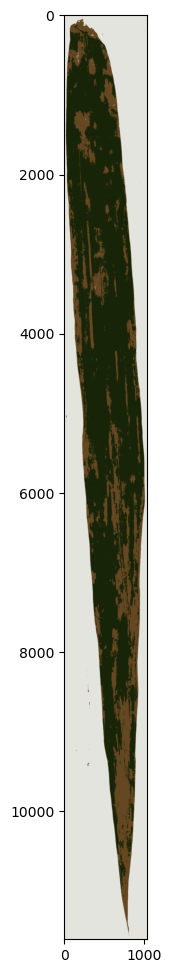

In [44]:
segmented = segmented/255
plt.figure(figsize=(12,12))
plt.imshow(segmented)